# **Manipulador robótico con 3 grados de libertad**

**Docente:** PhD Jorge Rudas

**Diseño de prototipos - 2025 I**

**INFOTEP**

In [2]:
import numpy as np
from sympy import*
from IPython.display import Image

init_printing()

In [3]:
Image(url='../Examples/3.png')

In [4]:
Image(url='../Examples/4.png')

Vamos a descrbir el algebra simula la dinámica directa del anterior brazo robótico

In [5]:
## Variables Simbolicas
theta_1 = symbols("theta_1",  real=True)
theta_2 = symbols("theta_2",  real=True)
theta_3 = symbols("theta_3",  real=True)
alpha = symbols("alpha",  real=True)

l_1 = symbols("l_1",  real=True)
l_2 = symbols("l_2",  real=True)
l_3 = symbols("l_3",  real=True)

Rotación de la base (articulación 1) un angulo theta 1 zobre el eje z

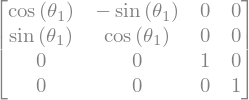

In [6]:
_0H1 = Matrix([[cos(theta_1), -sin(theta_1), 0, 0], [sin(theta_1), cos(theta_1), 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
_0H1


Translación l_1 sobre el eje z desde la base hasta la articulación 2

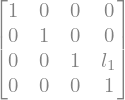

In [7]:
_1H2 = Matrix([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, l_1], [0, 0, 0, 1]])
_1H2


Rotación del sistema de referencia (90 grados sobre el eje X)

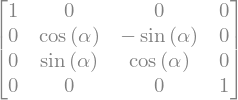

In [8]:
_2H3 = Matrix([[1, 0, 0, 0], [0, cos(alpha), -sin(alpha), 0], [0, sin(alpha), cos(alpha), 0], [0, 0, 0, 1]])
_2H3

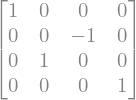

In [9]:
_2H3 = _2H3.subs(alpha, pi/2)
_2H3

Rotación theta_2 sobre el nuevo eje Z en la articulación 2

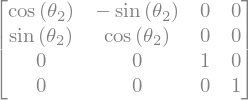

In [10]:
_3H4 = Matrix([[cos(theta_2), -sin(theta_2), 0, 0], [sin(theta_2), cos(theta_2), 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
_3H4


Translación l_2 sobre el nuevo eje X desde la articulación 2 hasta la articulación 3

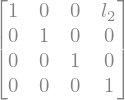

In [11]:
_4H5 = Matrix([[1, 0, 0, l_2], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
_4H5


Rotación theta_3 sobre el nuevo eje Z para la articulación 3

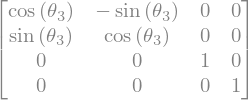

In [12]:
_5H6 = Matrix([[cos(theta_3), -sin(theta_3), 0, 0], [sin(theta_3), cos(theta_3), 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
_5H6


Traslación l_3 desde la articulación 3 hasta el efector final (muñeca)

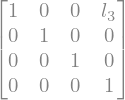

In [13]:
_6H7 = Matrix([[1, 0, 0, l_3], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
_6H7

Para encontrar la posición y la orientación del sistema de referencia W3 respecto a W0 se puede realizar la composición de las transformaciones de cada estado, así:

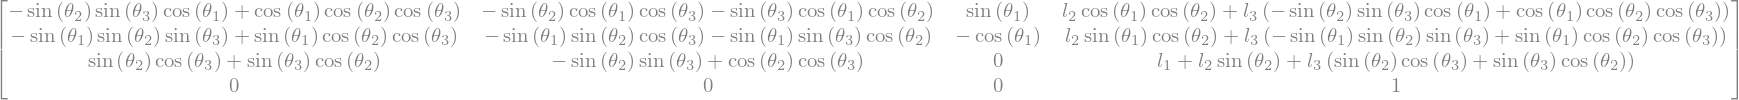

In [14]:
Hs =_0H1@_1H2@_2H3@_3H4@_4H5@_5H6@_6H7
Hs

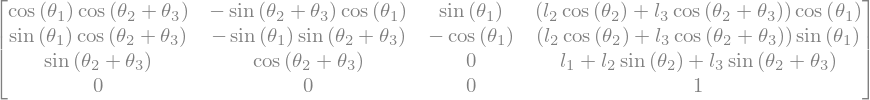

In [15]:
H = simplify(_0H1@_1H2@_2H3@_3H4@_4H5@_5H6@_6H7)
H

Esta será la posición final de la muñeca en función de theta1, theta2, theta3, l1, l2 y l3

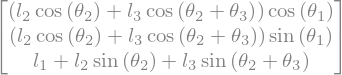

In [16]:
P = H[0:3, 3]
P

Y esta será la orientación final de la muñeca en función theta1, theta2, theta3, l1, l2 y l3

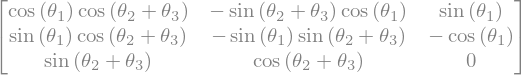

In [17]:
R = H[0:3, 0:3]
R

## Taller

Suponga un manipulador robotico con 3 grados de libertad. El brazo mide 40cm y el ante brazo mide 50cm. Los angulos de rotación no tienen restricciones. Suponga que la muñeca puede agarrar cualquier objeto que se encuentre a menos de 5cm de ella.

* Determine al menos 2 configuraciones de theta1, theta2 y theta3 que permitan alcanzar un objeto en la posición x=45, y=36, z=22. Utilice fuerza bruta para ello o cualquier estrategia objetiva para conseguirlo.

## Calificación

Los tres grupos con el mejor avance antes de finalizar la clase tendrá puntos extras en la calificación del corte, así:

* Mejor avance --> 0.3
* Segundo mejor avance --> 0.2
* Tercer mejor avance --> 0.1